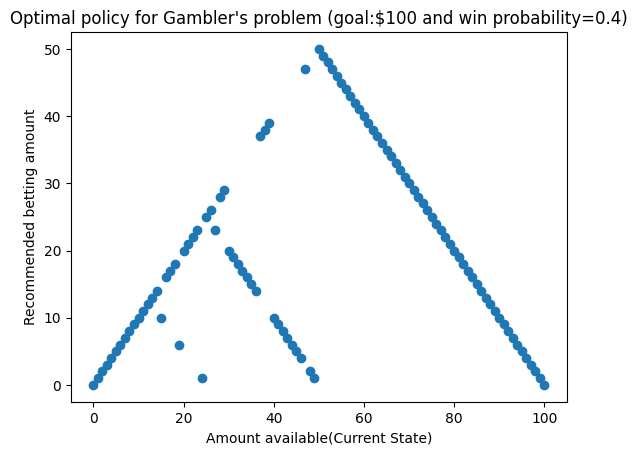

In [2]:
import numpy as np #Gamblers Problem using DP.
import matplotlib.pyplot as plt
np.random.seed(seed=42)
p_H=0.4
num_states = 100
values = np.zeros(shape=(num_states+1), dtype=np.float32)
policy = np.zeros(shape=(num_states+1), dtype=np.float32)
reward = np.zeros(shape=(num_states+1), dtype=np.float32)
reward[100] = 1
theta = 0.000001
gamma = 0.99
def valueIteration():
    while True:
        delta = 0
        for s in range(num_states):
            v = values[s]
            maximum_value = 0
            for bet in range(0, s+1):
                win_amount = min(s + bet, 100)
                lose_amount = s - bet
                average = p_H * (reward[win_amount] + gamma * values[win_amount]) + (1-p_H) * (reward[lose_amount] + gamma * values[lose_amount])
                if average > maximum_value:
                    policy[s] = bet
                    maximum_value = average
                    values[s] = average
 
            diff = np.abs(v - values[s])
            delta = max(delta, diff)
        if delta < theta:
            break
 
def plotPolicy():
    x = np.array(range(0, num_states+1))
    y = policy
    plt.xlabel("Amount available(Current State)")
    plt.ylabel('Recommended betting amount')
    plt.title("Optimal policy for Gambler's problem (goal:${} and win probability={})".format(num_states, p_H))
    plt.scatter(x,y)
    plt.show()
 
if __name__ =='__main__' :
    valueIteration()
    plotPolicy()
